## Application:  Exploring Hand-written Digits


Let's consider one piece of the optical character recognition problem: the identification of hand-written digits. In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use Scikit-Learn's set of pre-formatted digits, which is built into the library.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn
# use seaborn for plot defaults
# this can be safely commented out

import seaborn as sns
seaborn.set()

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels. Let's visualize the first hundred of these:

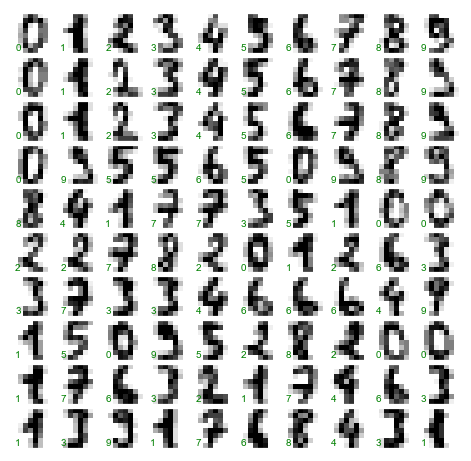

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In order to work with this data within Scikit-Learn, we need a two-dimensional, [n_samples, n_features] representation. We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit. Additionally, we need the target array, which gives the previously determined label for each digit. These two quantities are built into the digits dataset under the data and target attributes, respectively:

In [4]:
X = digits.data
X.shape

(1797, 64)

In [5]:
y = digits.target
y.shape

(1797,)

We would like to evaluate the model on data it has not seen before, and so we will split the data into a training set and a testing set. This could be done by hand, but it is more convenient to use the train_test_split utility function:

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y, random_state=1)

In [13]:
from sklearn.naive_bayes import GaussianNB
LL = GaussianNB()
LL.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

Now that we have predicted our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [14]:
# Evaluate your model here
Y_model=LL.predict(xtest)
LL.score(xtest,ytest)

0.8533333333333334

With even this extremely simple model, we find about 80% accuracy for classification of the digits! However, this single number doesn't tell us where we've gone wrong—one nice way to do this is to use the confusion matrix, which we can compute with Scikit-Learn and plot with Seaborn:

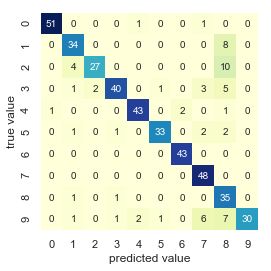

In [15]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, Y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap="YlGnBu")
plt.xlabel('predicted value')
plt.ylabel('true value');

This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights. Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels. We'll use green for correct labels, and red for incorrect labels:

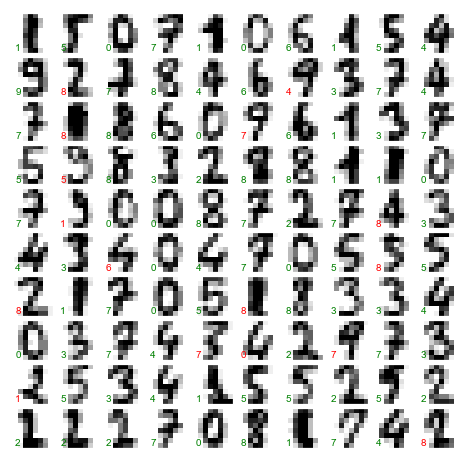

In [16]:
X_test = xtest
y_test = ytest
y_model = Y_model
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = X_test.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (y_test[i] == y_model[i]) else 'red')

# Use sklearn to preform linear regression on the data from the previous session